# Pokédex

> Bloque con sangría



Vamos a desarrollar una red neuronal capaz de reconocer todos los tipos de pokemones de la primera generación (6 pokemones actualmente):


dataset en:
https://drive.google.com/open?id=1qfzyhSMjG-zZFC1u2nwdDrEhWEHuXlDk


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecuación / Cambiar tipo de entorno de ejecución**

char2.jpg  hola.jpg  pica.jpg  prueba.jpg
char.jpg   mew.jpg   Pokemons  Sign-Language


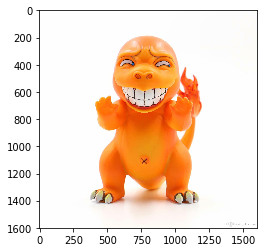

In [9]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/prueba.jpg', 'r')
imshow(np.asarray(pil_im))



In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Primer modelo

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Pokemons/Train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Pokemons/Validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 30

model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=10,
)

Using TensorFlow backend.


Found 200 images belonging to 5 classes.
Found 90 images belonging to 5 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
10/10 [==============================] - 87s 9s/step - loss: 2.5555 - acc: 0.2100 - val_loss: 1.6088 - val_acc: 0.1954
Epoch 2/30
10/10 [==============================] - 6s 595ms/step - loss: 1.5929 - acc: 0.2450 - val_loss: 1.6515 - val_acc: 0.2550
Epoch 3/30
10/10 [==============================] - 8s 812ms/step - loss: 1.8241 - acc: 0.2400 - val_loss: 1.5936 - val_acc: 0.3311
Epoch 4/30
10/10 [==============================] - 8s 764ms/step - loss: 1.5473 - acc: 0.3300 - val_loss: 1.3402 - val_acc: 0.3841
Epoch 5/30
10/10 [==============================] - 8s 762ms/step - loss: 1.3919 - acc: 0.4150 - val_loss: 1.1812 - val_acc: 0.6258
Epoch 6/30
10/10 [========

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np



img_path = '/content/drive/My Drive/Colab Notebooks/datasets/char2.jpg'
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x = x/255.

features = model.predict_classes(x)
print(features)

label_map = (train_generator.class_indices)
print(label_map)

